# Suicídios no Brasil, uma exploração de dados com Python.  

Olá, tudo bem meu caro leitor? Eu sou __[Wellington Faria](https://www.linkedin.com/in/wellicfaria/)__, muito prazer! :D
    
Para quem já me conhece, eu sou fascinado na linguagem de programação Python. Recentemente comecei a ler o livro, Data Science do Zero, que é um livro voltado para aqueles que como eu, tem interesse em se aventurar em Data Science, a área mais modinha no mercado de trabalho e considerado um das profissões mais sexy do século, como relata a Harvard Business Review(https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century).
    
Como ser disruptivo que sou, ou pelo menos tento ser, venho me aprofundando na área a passos de tartaruga. Lendo o livro, fiquei com vontade explorar alguns dados, para apresentar algumas informações. E assim cheguei no dataset(conjunto de dados) na Kaggle que contempla dados sobre suicídio.
    
O Kaggle é uma comunidade on-line de cientistas de dado, de propriedade da Google LLC. O Kaggle permite que os usuários encontrem e publiquem conjuntos de dados, para explorem dados e desenvolverem modelos de Inteligência Artificial. 

O dataset fornecido pela plataforma é um compilado de dados de 4 fontes de 1985 à 2016, são elas:

1.	United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

2.	World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

3.	[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

4.	World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/
    

O tema suicido está em alta no século e é a quarta causa de morte entre jovens de 15 a 29 anos no Brasil[1].  Idade do maior número de usuários de rede sociais, os quais estão impulsionando essa temática pela rede.  A ideia desse pequeno artigo é apresentar os números do Brasil, apresentando algumas reflexões quanto pertinentes, os códigos Python desenvolvido para a análise exploratória, e gráficos resultantes da análise. 
    

## Pandas para Manupular os Dados.

Para manipular o dataset(os dados), irei utilizar uma biblioteca Python chamada Pandas. Que é uma ferramenta de análise de dados e estruturas de dados de alta performance e fácil de usar. Além disso é open source e amplamente utilizada na comunidade acadêmica.

Para aprender um pouco mais sobre Pandas, você pode fazer esse tutorial: https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1 

In [34]:
import pandas as pd #Importando a biblioteca Pandas
import os
import numpy as np

#Recuperando o diretório Local
local_path = os.getcwd()
print('local_path = '+local_path)

#Diretório do Dataset
local_path_dataset = local_path+'\\suicide-rates-overview-1985-to-2016\\'+'master.csv'
print('local_path_dataset = '+local_path_dataset)

# Lê todo Dataset, o dataset é um aquivo CSV
dataset_full = pd.read_csv(local_path_dataset, encoding='ISO-8859-1') 

local_path = C:\Users\wcassiof\Desktop\data_suicide
local_path_dataset = C:\Users\wcassiof\Desktop\data_suicide\suicide-rates-overview-1985-to-2016\master.csv


## Sobre o Dataset
Podemos ver o que o dataset fornece as seguintes informações: país, ano, sexo, grupo etário, contagem de suicídios, população, taxa de suicídio por 100 mil, chave composta país-ano, IDH por ano, produto Interno Bruto por ano, produto Interno Bruto per capita, geração. 

In [154]:
# Dataset Carregado, limitando as 10 primeira linhas
dataset_full.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


## Selecionando os dados do Brasil

Então, como relatei o objetivo deste arquivo é analisar os dados do Brasil. Então vamos criar um dataframe, somente com os dados do Brasil.

In [153]:
#Criando um dataframe só com os dados do Brasil, limitando as 10 primeiras linhas
dataset_brazil = dataset_full[dataset_full['country']== 'Brazil']

dataset_brazil.head(10) 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X
4177,Brazil,1985,female,75+ years,32,988100,3.24,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4178,Brazil,1985,female,55-74 years,148,5650100,2.62,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4179,Brazil,1985,female,25-34 years,269,10798700,2.49,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4180,Brazil,1985,female,35-54 years,296,12185200,2.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4181,Brazil,1985,female,15-24 years,280,13751800,2.04,Brazil1985,0.576,"222,942,790,435",1898,Generation X


##  Primeira Pergunta:  O número de suicídios esta aumentado no Brasil? 


O código abaixo, eu fiz uma agregação por ano. Assim obtendo a taxa de suicídios. Podemos ver no gráfico que quase dobramos a taxa de suicídio no Brasil entre os anos 1985 a 2015. 

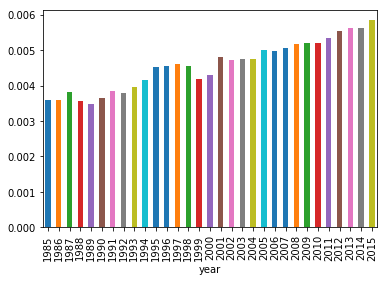

In [91]:
#Agrupando por Ano
grouped_by_year = dataset_brazil.groupby(['year'])

#Somando numero de suicidios por ano
df_suicides_no = grouped_by_year['suicides_no'].agg([np.sum])

#Somando total de População por ano
df_population = grouped_by_year['population'].agg([np.sum])

#criando um dataframe unindo os dois antetiores, por colunas. E renomeando as columas
df = pd.concat([df_suicides_no,df_population],axis=1)
df.columns = ['sum_suicides_no', 'sum_population']

#Calculando taxa em % de suicicios por total de habitantes
df_tax = df['sum_suicides_no'] / df['sum_population'] * 100
df_tax.plot.bar()

## Segunda Pergunta: Quem cometeu mais suicídios no Brasil, homens ou mulheres?  

No código abaixo podemos ver que os homens são os que mais cometem suicídios. Ficando com uma parcela de 78% do total de suicídios. 

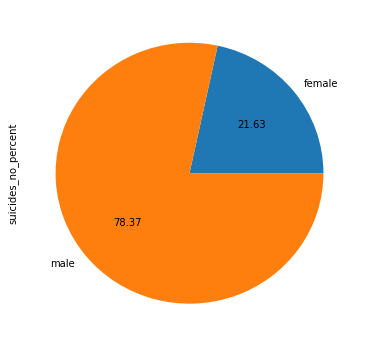

In [140]:
#Agrupando por Sexo
grouped_by_sex = dataset_brazil.groupby(['sex'])

#Somando numero de suicidios por sexo
df_suicides_no = grouped_by_sex['suicides_no'].agg([np.sum])
df_suicides_no.columns = ['suicides_no_percent']

#Calculando total de Sucidios 
sum_suicides_no = df_suicides_no.agg([np.sum])
total_suicides = sum_suicides_no['suicides_no_percent'][0]

df = df_suicides_no['suicides_no_percent'] /total_suicides


df.plot.pie(figsize=(6, 6),autopct='%.2f')

## Terceira Pergunta: Que idade mais suicídios acontereram no Brasil?  

No código abaixo podemos ver que a faixa etária de 35 a 54 anos são a que mais cometeram suicídio com 35%, a faixa 25 a 34 com 23% e 15 a 24 com 19% . 

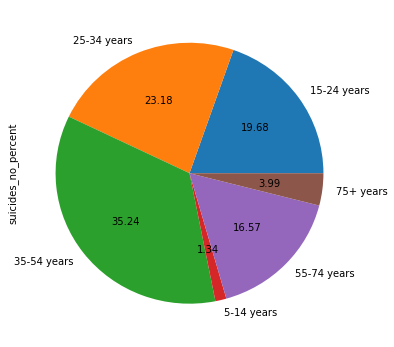

In [142]:
#Agrupando por idade
grouped_by_age = dataset_brazil.groupby(['age'])

#Somando numero de suicidios por idade
df_suicides_no = grouped_by_age['suicides_no'].agg([np.sum])
df_suicides_no.columns = ['suicides_no_percent']

#Calculando total de Sucidios 
sum_suicides_no = df_suicides_no.agg([np.sum])
total_suicides = sum_suicides_no['suicides_no_percent'][0]

df = df_suicides_no['suicides_no_percent'] /total_suicides


df.plot.pie(figsize=(6, 6),autopct='%.2f')

## Quarta Pergunta: Qual geração cometeu menos suicídios?  

A Geração Grandiosa (1901 - 1924) foi a que menos cometeu suicídio com 3.45%, seguida da Geração Silenciosa (1925 - 1942) com 16.61%. Sendo que a Geração X (1965 - 1979) possui o maior porcentagem de suicídios com 31.32%, muito próxima a geração Baby Boom (1943 - 1964) . A a geração milênio(1982 - 1990) já conta com 17.10%.


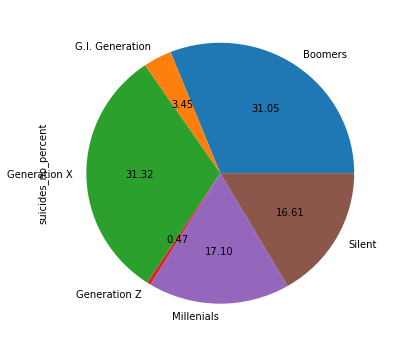

In [151]:
#Agrupando por geração
grouped_by_generation = dataset_brazil.groupby(['generation'])

#Somando numero de suicidios por geração
df_suicides_no = grouped_by_generation['suicides_no'].agg([np.sum])
df_suicides_no.columns = ['suicides_no_percent']

#Calculando total de Sucidios 
sum_suicides_no = df_suicides_no.agg([np.sum])
total_suicides = sum_suicides_no['suicides_no_percent'][0]

df = df_suicides_no['suicides_no_percent'] /total_suicides


df.plot.pie(figsize=(6, 6),autopct='%.2f')

## Precisa de Ajuda? Esta pensando em Suicidio? 

Entre em contado com o Centro de Valorização da Vida (CVV): em 2017, 2 milhões de pessoas ligaram de maneira gratuita para o número 188, que oferece apoio emocional e de prevenção do suicídio. O serviço opera 24 horas e também está disponível por e-mail e chat.

## Referências

[1] https://g1.globo.com/bemestar/noticia/2018/09/20/suicidios-aumentam-23-em-1-ano-e-brasil-tem-1-caso-a-cada-46-minutos.ghtml
